In [28]:
import pandas as pd
doc=pd.read_csv("used4.5.csv")
doc

,Unnamed: 0,name,review,index,Category
0,0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",0,Baby_Care
1,1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,1,Diapering
2,2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,2,Nursery
3,3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,3,Baby_Care
4,4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,4,Baby_Care
...,...,...,...,...,...
408,654,U·nikaka Unisex Baby 0-48 Months 5-Pack Pants ...,The sweaters are very nice and fit quite well....,654,Apparel_accessories
409,658,U·nikaka Unisex Baby 0-48 Months 5-Pack Pants ...,My 13 month old is short and round lol. So I’m...,658,Apparel_accessories
410,660,HAICHEN TEC Ferret Clothes Turtleneck Sweater ...,This is sp cute and hilarious 100 recomend goo...,660,Apparel_accessories
411,661,HAICHEN TEC Ferret Clothes Turtleneck Sweater ...,Mr. B is only 4 weeks old and looks so handsom...,661,Apparel_accessories


In [29]:
data_text=doc[["review","Category"]]
data_text['index']=data_text.index

documents=data_text

<ipython-input-29-318acfee2307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index']=data_text.index


In [30]:
documents

,review,Category,index
0,"These flannel wipes are OK, but in my opinion ...",Baby_Care,0
1,it came early and was not disappointed. i love...,Diapering,1
2,Very soft and comfortable and warmer than it l...,Nursery,2
3,This is a product well worth the purchase. I ...,Baby_Care,3
4,All of my kids have cried non-stop when I trie...,Baby_Care,4
...,...,...,...
408,The sweaters are very nice and fit quite well....,Apparel_accessories,408
409,My 13 month old is short and round lol. So I’m...,Apparel_accessories,409
410,This is sp cute and hilarious 100 recomend goo...,Apparel_accessories,410
411,Mr. B is only 4 weeks old and looks so handsom...,Apparel_accessories,411


In [31]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import nltk.stem as stemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/deth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
stemmer=PorterStemmer()
def lemmatize_stemming(text):
      return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >3:
              result.append(lemmatize_stemming(token))
  
    return result

In [33]:
doc_sample=documents[documents['index']==4].values[0][0]
print('original document')
words=[]
for word in doc_sample.split(' '):
      words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document
['All', 'of', 'my', 'kids', 'have', 'cried', 'non-stop', 'when', 'I', 'tried', 'to', 'ween', 'them', 'off', 'their', 'pacifier,', 'until', 'I', 'found', 'Thumbuddy', 'To', "Love's", 'Binky', 'Fairy', 'Puppet.', '', 'It', 'is', 'an', 'easy', 'way', 'to', 'work', 'with', 'your', 'kids', 'to', 'allow', 'them', 'to', 'understand', 'where', 'their', 'pacifier', 'is', 'going', 'and', 'help', 'them', 'part', 'from', 'it.This', 'is', 'a', 'must', 'buy', 'book,', 'and', 'a', 'great', 'gift', 'for', 'expecting', 'parents!!', '', 'You', 'will', 'save', 'them', 'soo', 'many', 'headaches.Thanks', 'for', 'this', 'book!', '', 'You', 'all', 'rock!!']


 tokenized and lemmatized document: 
['kid', 'cri', 'stop', 'tri', 'ween', 'pacifi', 'thumbuddi', 'love', 'binki', 'fairi', 'puppet', 'easi', 'work', 'kid', 'allow', 'understand', 'pacifi', 'go', 'help', 'book', 'great', 'gift', 'expect', 'parent', 'save', 'headach', 'thank', 'book', 'rock']


In [34]:
documents.dropna(subset = ["review"], inplace=True) # drop those rows which have NaN value cells


<ipython-input-34-00cd468fc166>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  documents.dropna(subset = ["review"], inplace=True) # drop those rows which have NaN value cells


In [35]:
processed_docs = documents['review'].map(preprocess)
processed_docs

0      [flannel, wipe, opinion, worth, keep, order, s...
1      [come, earli, disappoint, love, planet, wise, ...
2      [soft, comfort, warmer, look, size, perfectli,...
3      [product, worth, purchas, like, posit, ingeni,...
4      [kid, cri, stop, tri, ween, pacifi, thumbuddi,...
                             ...                        
408    [sweater, nice, ferret, mind, fabric, great, p...
409    [month, short, round, find, difficult, pant, p...
410    [cute, hilari, recomend, good, ador, halloween...
411    [week, look, handsom, littl, sweater, hard, sw...
412    [want, dress, guinea, sweater, small, especi, ...
Name: review, Length: 413, dtype: object

In [36]:
dictionary=gensim.corpora.Dictionary(processed_docs)
count=0

for k,v in dictionary.iteritems():
    print(k,v)
    count+=1
    if count>10:
        break

0 blue
1 boyfor
2 cloth
3 countwhich
4 face
5 flannel
6 hand
7 handl
8 higher
9 issu
10 keep


In [37]:
dictionary.filter_extremes(no_below=15,no_above=0.5)


In [38]:
bow_corpus=[dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4]


[(13, 1),
 (24, 2),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 2),
 (32, 1),
 (33, 1),
 (34, 1)]

In [39]:
from gensim import corpora, models
tfidf=models.TfidfModel(bow_corpus)
corpus_tfidf=tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.37378287425890977),
 (1, 0.2910888830907095),
 (2, 0.32540999039054613),
 (3, 0.1454802833186967),
 (4, 0.2846385440521788),
 (5, 0.36733253522037906),
 (6, 0.36121313179202574),
 (7, 0.31688477799387366),
 (8, 0.28153961109325704),
 (9, 0.3498424166134522)]


In [40]:
bow_doc_4=corpus_tfidf[4]
for i in range(len(bow_doc_4)):
    print("Word {} (\"{}\") is weighted {} in the dataset.".format(bow_doc_4[i][0], 
                                               dictionary[bow_doc_4[i][0]], 
bow_doc_4[i][1]))

Word 13 ("love") is weighted 0.08715637917887972 in the dataset.
Word 24 ("book") is weighted 0.3507049773213626 in the dataset.
Word 25 ("easi") is weighted 0.17980086488264918 in the dataset.
Word 26 ("expect") is weighted 0.3170277293126538 in the dataset.
Word 27 ("gift") is weighted 0.23331291836146587 in the dataset.
Word 28 ("go") is weighted 0.22814285686849048 in the dataset.
Word 29 ("great") is weighted 0.12142737689587782 in the dataset.
Word 30 ("help") is weighted 0.24761156810927779 in the dataset.
Word 31 ("kid") is weighted 0.6101185471094931 in the dataset.
Word 32 ("parent") is weighted 0.2644307339604643 in the dataset.
Word 33 ("tri") is weighted 0.24457566726673635 in the dataset.
Word 34 ("work") is weighted 0.22814285686849048 in the dataset.


In [41]:
lda_model_tfidf=gensim.models.LdaMulticore(corpus_tfidf,num_topics=8,id2word=dictionary,passes=2,workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
      print('Topic: {} Word: {}'.format(idx,topic))

Topic: 0 Word: 0.025*"love" + 0.024*"book" + 0.023*"month" + 0.022*"babi" + 0.022*"high" + 0.022*"learn" + 0.022*"great" + 0.021*"buy" + 0.019*"item" + 0.017*"time"
Topic: 1 Word: 0.042*"sling" + 0.032*"gift" + 0.027*"babi" + 0.027*"monitor" + 0.025*"camera" + 0.021*"great" + 0.019*"play" + 0.016*"like" + 0.016*"give" + 0.016*"month"
Topic: 2 Word: 0.039*"book" + 0.029*"year" + 0.025*"like" + 0.021*"look" + 0.021*"babi" + 0.021*"diaper" + 0.020*"page" + 0.020*"happi" + 0.019*"love" + 0.017*"track"
Topic: 3 Word: 0.039*"play" + 0.025*"great" + 0.022*"easi" + 0.021*"favorit" + 0.020*"look" + 0.019*"item" + 0.019*"go" + 0.018*"like" + 0.018*"babi" + 0.018*"month"
Topic: 4 Word: 0.031*"love" + 0.023*"easi" + 0.022*"babi" + 0.022*"need" + 0.020*"disappoint" + 0.019*"room" + 0.019*"nice" + 0.019*"good" + 0.019*"year" + 0.018*"littl"
Topic: 5 Word: 0.034*"book" + 0.030*"price" + 0.028*"good" + 0.028*"qualiti" + 0.027*"famili" + 0.027*"cute" + 0.026*"teeth" + 0.023*"interact" + 0.021*"vibrat" 

In [42]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4]],key=lambda tup:-1*tup[1]):
  print("\nScore:{}\t \nTopic:{}".format(score,lda_model_tfidf.print_topic(index,10)))


Score:0.9415656328201294	 
Topic:0.027*"perfect" + 0.027*"diaper" + 0.025*"book" + 0.023*"think" + 0.022*"daughter" + 0.021*"babi" + 0.021*"year" + 0.020*"start" + 0.019*"receiv" + 0.019*"love"


In [43]:
unseen_document = 'This wallpaper has always been one of my favorite  '
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    
        print("\nScore:{}\t \nTopic:{}\n".format(score,lda_model_tfidf.print_topic(index,5)))


Score:0.5622976422309875	 
Topic:0.039*"play" + 0.025*"great" + 0.022*"easi" + 0.021*"favorit" + 0.020*"look"


Score:0.06257707625627518	 
Topic:0.025*"love" + 0.024*"book" + 0.023*"month" + 0.022*"babi" + 0.022*"high"


Score:0.06253772228956223	 
Topic:0.039*"book" + 0.029*"year" + 0.025*"like" + 0.021*"look" + 0.021*"babi"


Score:0.0625343769788742	 
Topic:0.034*"book" + 0.030*"price" + 0.028*"good" + 0.028*"qualiti" + 0.027*"famili"


Score:0.06253432482481003	 
Topic:0.027*"perfect" + 0.027*"diaper" + 0.025*"book" + 0.023*"think" + 0.022*"daughter"


Score:0.0625104308128357	 
Topic:0.042*"sling" + 0.032*"gift" + 0.027*"babi" + 0.027*"monitor" + 0.025*"camera"


Score:0.06250793486833572	 
Topic:0.049*"teether" + 0.033*"stick" + 0.031*"free" + 0.026*"vibrat" + 0.025*"buy"


Score:0.0625004917383194	 
Topic:0.031*"love" + 0.023*"easi" + 0.022*"babi" + 0.022*"need" + 0.020*"disappoint"



In [44]:
def format_topic_sentences(lda_model=lda_model_tfidf, corpus=bow_corpus, texts=processed_docs):
    sent_topics_df=pd.DataFrame()
    
    for i, row_list in enumerate(lda_model[corpus]):
        row=row_list[0] if lda_model.per_word_topics else row_list
        row=sorted(row,key=lambda x:(x[1]),reverse=True)
        
        for j, (topic_num,prop_topic) in enumerate(row):
            if j==0:
                wp=lda_model.show_topic(topic_num)
                topic_keywords=', '.join([word for word, prop in wp])
                sent_topics_df=sent_topics_df.append(pd.Series([int(topic_num),round(prop_topic,4),topic_keywords]),ignore_index=True)
            else:
                break
    sent_topics_df.columns=['Dominant_topic','Perc_contribution','Topic_keywords']
    contents=pd.Series(texts)
    sent_topics_df=pd.concat([sent_topics_df,contents],axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topic_sentences(lda_model=lda_model_tfidf, corpus=bow_corpus, texts=processed_docs)

# Format.  
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic['index']=df_dominant_topic.index
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,index
0,0,4.0,0.9203,"love, easi, babi, need, disappoint, room, nice...","[flannel, wipe, opinion, worth, keep, order, s...",0
1,1,4.0,0.8540,"love, easi, babi, need, disappoint, room, nice...","[come, earli, disappoint, love, planet, wise, ...",1
2,2,6.0,0.8540,"perfect, diaper, book, think, daughter, babi, ...","[soft, comfort, warmer, look, size, perfectli,...",2
3,3,6.0,0.9270,"perfect, diaper, book, think, daughter, babi, ...","[product, worth, purchas, like, posit, ingeni,...",3
4,4,6.0,0.9416,"perfect, diaper, book, think, daughter, babi, ...","[kid, cri, stop, tri, ween, pacifi, thumbuddi,...",4
...,...,...,...,...,...,...
408,408,1.0,0.9026,"sling, gift, babi, monitor, camera, great, pla...","[sweater, nice, ferret, mind, fabric, great, p...",408
409,409,6.0,0.9203,"perfect, diaper, book, think, daughter, babi, ...","[month, short, round, find, difficult, pant, p...",409
410,410,5.0,0.8247,"book, price, good, qualiti, famili, cute, teet...","[cute, hilari, recomend, good, ador, halloween...",410
411,411,6.0,0.9027,"perfect, diaper, book, think, daughter, babi, ...","[week, look, handsom, littl, sweater, hard, sw...",411


In [45]:
new_df_1 = pd.merge(df_dominant_topic, documents[['Category','index','review']], on='index')

new_df_1

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,index,Category,review
0,0,4.0,0.9203,"love, easi, babi, need, disappoint, room, nice...","[flannel, wipe, opinion, worth, keep, order, s...",0,Baby_Care,"These flannel wipes are OK, but in my opinion ..."
1,1,4.0,0.8540,"love, easi, babi, need, disappoint, room, nice...","[come, earli, disappoint, love, planet, wise, ...",1,Diapering,it came early and was not disappointed. i love...
2,2,6.0,0.8540,"perfect, diaper, book, think, daughter, babi, ...","[soft, comfort, warmer, look, size, perfectli,...",2,Nursery,Very soft and comfortable and warmer than it l...
3,3,6.0,0.9270,"perfect, diaper, book, think, daughter, babi, ...","[product, worth, purchas, like, posit, ingeni,...",3,Baby_Care,This is a product well worth the purchase. I ...
4,4,6.0,0.9416,"perfect, diaper, book, think, daughter, babi, ...","[kid, cri, stop, tri, ween, pacifi, thumbuddi,...",4,Baby_Care,All of my kids have cried non-stop when I trie...
...,...,...,...,...,...,...,...,...
408,408,1.0,0.9026,"sling, gift, babi, monitor, camera, great, pla...","[sweater, nice, ferret, mind, fabric, great, p...",408,Apparel_accessories,The sweaters are very nice and fit quite well....
409,409,6.0,0.9203,"perfect, diaper, book, think, daughter, babi, ...","[month, short, round, find, difficult, pant, p...",409,Apparel_accessories,My 13 month old is short and round lol. So I’m...
410,410,5.0,0.8247,"book, price, good, qualiti, famili, cute, teet...","[cute, hilari, recomend, good, ador, halloween...",410,Apparel_accessories,This is sp cute and hilarious 100 recomend goo...
411,411,6.0,0.9027,"perfect, diaper, book, think, daughter, babi, ...","[week, look, handsom, littl, sweater, hard, sw...",411,Apparel_accessories,Mr. B is only 4 weeks old and looks so handsom...


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
count_vec=CountVectorizer()
bow=count_vec.fit_transform(new_df_1['Keywords'].astype(str))
bow=np.array(bow.todense())
bow1=count_vec.fit_transform(new_df_1['Text'].astype(str))
bow1=np.array(bow1.todense())
bow2=np.concatenate((bow,bow1),axis=1)

In [47]:
x=bow2
y=new_df_1['Category']

In [48]:
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=123)


In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm


model=svm.SVC(kernel='linear', C=1, random_state=0)
history=model.fit(X_train,y_train)
history

SVC(C=1, kernel='linear', random_state=0)

In [50]:
y_pred1=model.predict(X_test)

x11=accuracy_score(y_test,y_pred1)
x11

0.5421686746987951

In [51]:
print(classification_report(y_test, y_pred1))


                        precision    recall  f1-score   support

Activity_entertainment       0.60      0.43      0.50         7
   Apparel_accessories       0.50      0.50      0.50         4
             Baby_Care       0.85      0.65      0.73        17
       Baby_stationary       0.44      0.73      0.55        11
     Baby_toddler_toys       0.40      0.47      0.43        17
             Diapering       0.80      0.67      0.73         6
                  Gift       0.43      0.33      0.38         9
               Nursery       0.55      0.50      0.52        12

              accuracy                           0.54        83
             macro avg       0.57      0.53      0.54        83
          weighted avg       0.57      0.54      0.55        83



In [52]:
results = pd.DataFrame(data={'predicted': y_pred1, 'actual': y_test})
results['result'] = np.where(results['predicted']==results['actual'], 1, 0)
results.sort_values(by='result').head(20)

,predicted,actual,result
389,Baby_toddler_toys,Activity_entertainment,0
58,Baby_toddler_toys,Gift,0
81,Baby_toddler_toys,Diapering,0
366,Baby_Care,Diapering,0
63,Gift,Baby_stationary,0
113,Nursery,Baby_toddler_toys,0
197,Nursery,Baby_toddler_toys,0
92,Apparel_accessories,Nursery,0
185,Gift,Baby_toddler_toys,0
104,Baby_Care,Gift,0


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


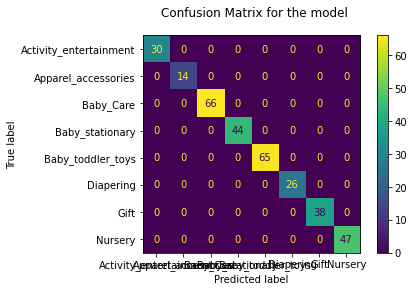

In [53]:
import matplotlib.pyplot as plt
fig = plot_confusion_matrix(model, X_train, y_train, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for the model")
plt.show()

In [54]:
plt.plot(model.loss_curve_)
# plt.plot(model.coef_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

AttributeError: 'SVC' object has no attribute 'loss_curve_'